# Topical Impact on the Euro-Dollar Exchange Rate: 2020 Pandemic

This brief analysis uses daily Euro exchange rate data from the European Central bank, available on Kaggle here: (https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020)

We will explore and clean the data before wrangling values from key dates for a line plot. We plan to use Euro-Dollar data so our focus will be cleaning and preparing those particular values.

## File Upload and Brief Exploration

We begin by importing our relevant libraries and loading our dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime
from matplotlib.dates import date2num
%matplotlib inline


exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.tail(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

There are 41 columns and 5699 records in our raw dataset. There are some missing values for specific currencies, particularly `Greek drachma` at 520 records. Most currencies are listed as string objects rather than floats, including the `US Dollar`.

`Period/Unit` dates range from 1/4/1999 to 1/8/2021 and are also listed as a string object rather than datetime.

## Data Cleaning

We will update columns for legibility, convert our dates from string to datetime (renamed `Time`), and sort our newly minted dates. We will also explore the `US_dollar` column prior to cleansing.

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.4729     1
1.0600     1
1.5540     1
1.0775     1
0.8882     1
Name: US_dollar, Length: 3528, dtype: int64

Now that we have explored the `US_dollar` column, we realize that there are '-' values. We will remove them and cast `US_dollar` to float values.

## Line Plot Exploration: Euro-Dollar Exchange Rates

We want to get a general feel for our newly cleansed dataset, so we generate a line plot to note potential stories.

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

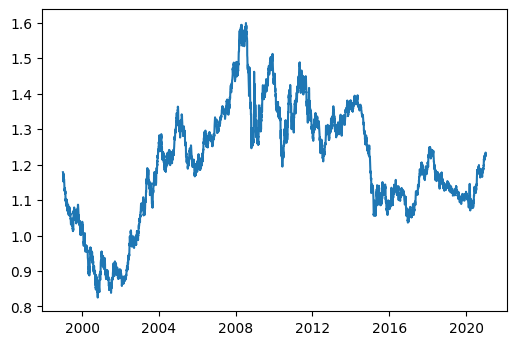

In [7]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In [8]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


We notice that exchange rates greatly vary on a daily basis, so we generate a `rolling_mean` columnn that uses rolling 30 day averages. This smooths the line of our graph and we will use it moving forward in our analysis.

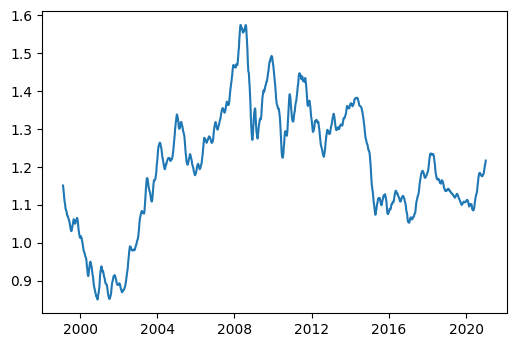

In [9]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

## Analysis: How did the pandemic impact exchange rates?

We see a big drop in 2020 We will first create a dataset that reviews 2016-2020, then another for just 2020. This will help us build our line plot.  We will also calculate min and max values for 2020.

In [47]:
style.use('dark_background')

euro_to_dollar_target = euro_to_dollar[euro_to_dollar['Time']
                                 >'2015-12-31']
euro_to_dollar_pinpoint = euro_to_dollar[(euro_to_dollar['Time']
                                 >'2019-12-13') 
                            & (euro_to_dollar['Time']<='2020-12-31')]
pinpoint_min = euro_to_dollar_pinpoint['US_dollar'].min()
pinpoint_max = euro_to_dollar_pinpoint['US_dollar'].max()
target_min = euro_to_dollar_target['US_dollar'].min()
target_max = euro_to_dollar_target['US_dollar'].max()
print('2020 max exhange rate:',pinpoint_max)
print('2020 min exchange rate:',pinpoint_min)
print('%growth between min and max:',(pinpoint_max-pinpoint_min)/pinpoint_min)

2020 max exhange rate: 1.2281
2020 min exchange rate: 1.0707
%growth between min and max: 0.14700663117586624


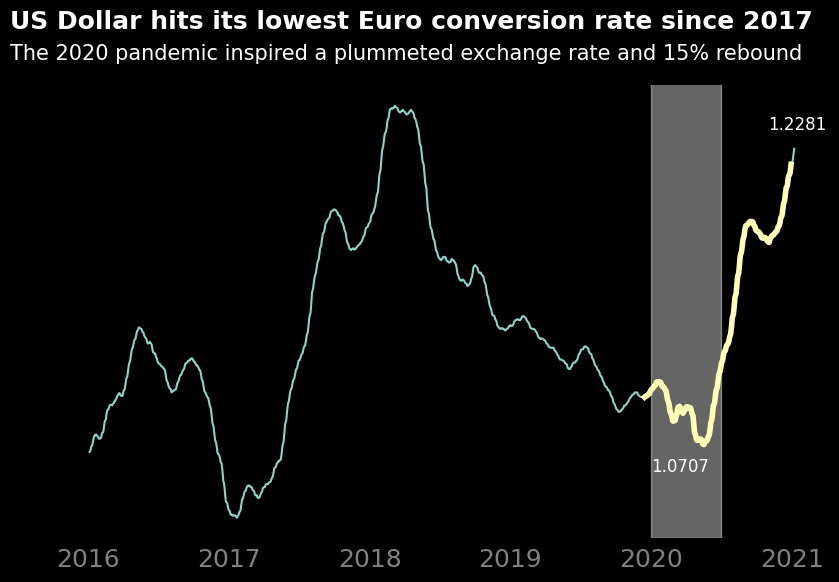

In [85]:
# initiate figure
fig, ax = plt.subplots(figsize=(10,6))

# create main line-plot 2016-2021
ax.plot(euro_to_dollar_target['Time'],
        euro_to_dollar_target['rolling_mean'])

# create highlight line-plot 2020
ax.plot(euro_to_dollar_pinpoint['Time'],
        euro_to_dollar_pinpoint['rolling_mean'],
        lw=4)

# spotlight for 2020
ax.axvspan(date2num(datetime(2020,1,1)),date2num(datetime(2020,7,1)),
          color='w', alpha=.4,ymax=1.2)

# title and subtitle
# use date2num library to convert dates to readable nums
ax.text(date2num(datetime(2015,6,11)),1.27,"US Dollar hits its lowest Euro conversion rate since 2017",size=18,weight='bold')
ax.text(date2num(datetime(2015,6,11)),1.256,"The 2020 pandemic inspired a plummeted exchange rate and 15% rebound",size=15)

# graph labels
ax.text(date2num(datetime(2020,1,1)),1.073,pinpoint_min,size=12)
ax.text(date2num(datetime(2020,11,1)),1.225,pinpoint_max,size=12)

# axis edits: remove ticks and frame, recolor xaxis labels
ax.get_yaxis().set_ticks([])
ax.tick_params(axis='x',labelsize=18, colors='grey')
ax.tick_params(bottom=False, left=False)
for location in ['top','left','bottom','right']:
    ax.spines[location].set_visible(False)


## Conclusion

We see that the Euro-Dollar exchange rate not only dropped to a new depth (since 2017), it also rebounded by 15% in the same same year with the upward trend continuing into 2021. 